[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


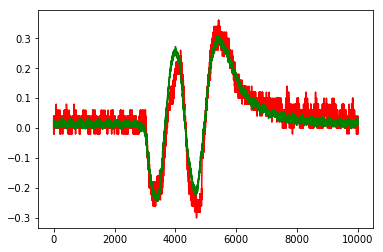

In [32]:
#!/usr/bin/env python
import csv
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline



#first I want to take the two signals and write them to arrays in python that I can apply the DTW to
#to do this to the the csv I will import the CH2 column from both of the files and then run my analysis

csv = np.genfromtxt('tek0000.csv', delimiter = ",", skip_header = 1)
a = csv[:,1]

csv = np.genfromtxt('tek0001.csv', delimiter = ",", skip_header=1)
b = csv[:,1]

csv = np.genfromtxt('tek0002.csv', delimiter = ",", skip_header = 1)
c = csv[:,1]

csv = np.genfromtxt('tek0003.csv', delimiter = ",", skip_header=1)
d = csv[:,1]

csv = np.genfromtxt('tek0004.csv', delimiter = ",", skip_header = 1)
e = csv[:,1]

csv = np.genfromtxt('tek0005.csv', delimiter = ",", skip_header=1)
f = csv[:,1]

csv = np.genfromtxt('tek0006.csv', delimiter = ",", skip_header = 1)
g = csv[:,1]

csv = np.genfromtxt('tek0007.csv', delimiter = ",", skip_header=1)
h = csv[:,1]

csv = np.genfromtxt('tek0008.csv', delimiter = ",", skip_header = 1)
i = csv[:,1]

csv = np.genfromtxt('tek0009.csv', delimiter = ",", skip_header=1)
j = csv[:,1]

csv = np.genfromtxt('tek00010.csv', delimiter = ",", skip_header = 1)
k = csv[:,1]

csv = np.genfromtxt('tek0005.csv', delimiter = ",", skip_header=1)
fadi1 = csv[:,1]

fadi2 = (a+b+c+d+e+f+g+h+i+j+k)/10

# I now have the data in my two np arrays we can now plot them to see wat they will look like
plt.plot(fadi1, 'r', label = 'Data1')
plt.plot(fadi2, 'g', label = 'Data 2')

#From here we want to see if they are similar.  We will do this by creating a mapping of between all of the points in the tow signals
#to compute the distance e have to make a 2d matrix
distances = np.zeros((len(fadi2), len(fadi1)))

print(distances)

[[0.0001   0.0009   0.0009   ... 0.0009   0.0009   0.0001  ]
 [0.000676 0.000196 0.002116 ... 0.002116 0.000196 0.000676]
 [0.000256 0.000576 0.001296 ... 0.001296 0.000576 0.000256]
 ...
 [0.000484 0.000324 0.001764 ... 0.001764 0.000324 0.000484]
 [0.000576 0.000256 0.001936 ... 0.001936 0.000256 0.000576]
 [0.000196 0.000676 0.001156 ... 0.001156 0.000676 0.000196]]


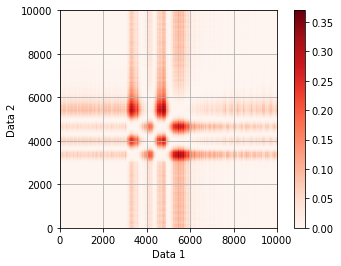

In [33]:
for i in range(len(fadi2)):
    for j in range(len(fadi1)):
        distances[i,j] = (fadi1[j]-fadi2[i])**2  
        
print(distances)
#for this distance we can choose between a couple different options but we will opt to use the Euclidean distance
#we now want to plot the distance that we just calculted and we can use a heat map to do this

def distance_cost_plot(distances):
    im = plt.imshow(distances, interpolation='nearest', cmap='Reds')
    plt.gca().invert_yaxis()
    plt.xlabel("Data 1")
    plt.ylabel("Data 2")
    plt.grid()
    plt.colorbar()


distance_cost_plot(distances)

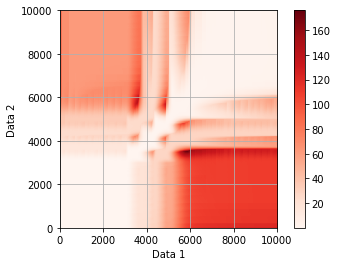

In [34]:
accumulated_cost = np.zeros((len(fadi2), len(fadi1)))
accumulated_cost[0,0] = distances[0,0]
#distance_cost_plot(accumulated_cost)

for i in range(1, len(fadi1)):
    accumulated_cost[0,i] = distances[0,i] + accumulated_cost[0, i-1]

#distance_cost_plot(accumulated_cost)

for i in range(1, len(fadi2)):
    accumulated_cost[i,0] = distances[i, 0] + accumulated_cost[i-1, 0]  

#distance_cost_plot(accumulated_cost)

for i in range(1, len(fadi2)):
    for j in range(1, len(fadi1)):
        accumulated_cost[i, j] = min(accumulated_cost[i-1, j-1], accumulated_cost[i-1, j], accumulated_cost[i, j-1]) + distances[i, j]

distance_cost_plot(accumulated_cost)

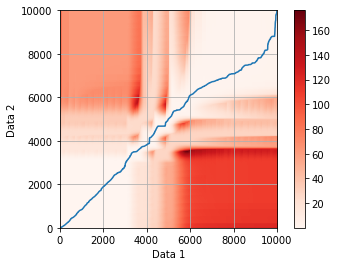

In [36]:
path = [[len(fadi1)-1, len(fadi2)-1]]
i = len(fadi2)-1
j = len(fadi1)-1
while i>0 and j>0:
    if i==0:
        j = j - 1
    elif j==0:
        i = i - 1
    else:
        if accumulated_cost[i-1, j] == min(accumulated_cost[i-1, j-1], accumulated_cost[i-1, j], accumulated_cost[i, j-1]):
            i = i - 1
        elif accumulated_cost[i, j-1] == min(accumulated_cost[i-1, j-1], accumulated_cost[i-1, j], accumulated_cost[i, j-1]):
            j = j-1
        else:
            i = i - 1
            j= j- 1
    path.append([j, i])
path.append([0,0])

path

path_x = [point[0] for point in path]
path_y = [point[1] for point in path]
distance_cost_plot(accumulated_cost)
plt.plot(path_x, path_y)

In [37]:
def path_cost(fadi1, fadi2, accumulated_cost, distances):
    path = [[len(fadi1)-1, len(fadi2)-1]]
    cost = 0
    i = len(fadi2)-1
    j = len(fadi1)-1
    while i>0 and j>0:
        if i==0:
            j = j - 1
        elif j==0:
            i = i - 1
        else:
            if accumulated_cost[i-1, j] == min(accumulated_cost[i-1, j-1], accumulated_cost[i-1, j], accumulated_cost[i, j-1]):
                i = i - 1
            elif accumulated_cost[i, j-1] == min(accumulated_cost[i-1, j-1], accumulated_cost[i-1, j], accumulated_cost[i, j-1]):
                j = j-1
            else:
                i = i - 1
                j= j- 1
        path.append([j, i])
    path.append([0,0])
    for [fadi2, fadi1] in path:
        cost = cost +distances[fadi1, fadi2]
    return path, cost 

path, cost = path_cost(fadi1, fadi2, accumulated_cost, distances)
print(path)
print(cost)

#this is an implementation that we have created for this problem but we can also try it using a library that pythn has ad see the difference

[[9999, 9999], [9998, 9998], [9998, 9997], [9998, 9996], [9998, 9995], [9997, 9994], [9996, 9994], [9995, 9993], [9995, 9992], [9995, 9991], [9995, 9990], [9995, 9989], [9995, 9988], [9995, 9987], [9995, 9986], [9995, 9985], [9995, 9984], [9995, 9983], [9995, 9982], [9995, 9981], [9995, 9980], [9995, 9979], [9995, 9978], [9995, 9977], [9995, 9976], [9995, 9975], [9995, 9974], [9995, 9973], [9995, 9972], [9995, 9971], [9995, 9970], [9995, 9969], [9995, 9968], [9995, 9967], [9995, 9966], [9995, 9965], [9995, 9964], [9995, 9963], [9995, 9962], [9995, 9961], [9995, 9960], [9995, 9959], [9995, 9958], [9995, 9957], [9995, 9956], [9995, 9955], [9995, 9954], [9995, 9953], [9995, 9952], [9995, 9951], [9995, 9950], [9995, 9949], [9995, 9948], [9995, 9947], [9995, 9946], [9995, 9945], [9995, 9944], [9995, 9943], [9995, 9942], [9995, 9941], [9995, 9940], [9995, 9939], [9995, 9938], [9995, 9937], [9995, 9936], [9995, 9935], [9995, 9934], [9995, 9933], [9995, 9932], [9995, 9931], [9995, 9930], [9995

127.31999999999292


TypeError: Invalid dimensions for image data

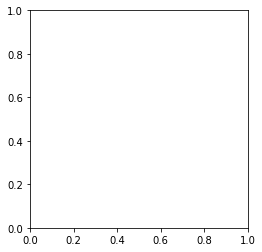

In [17]:
#attempt using the fastdtw library which is linear complexity

from scipy.spatial.distance import euclidean

from fastdtw import fastdtw

distance, path = fastdtw(fadi1, fadi2, dist=euclidean)
print(distance)

import matplotlib.cm as cm
fig = plt.figure(1)
ax = fig.add_subplot(111)
plot1 = plt.imshow(cost.T, origin='lower', cmap=cm.gray, interpolation='nearest')
plot2= plt.plot(path[0], path[1], 'w')
xlim = ax.set_xlim((-.05, cost.shape[0]-.05))
ylim = ax.set_ylim((-0.5, cost.shape[1]-0.5))

dist

In [ ]:
plt.plot(fadi1, 'bo-' ,label='Fadi 1')
plt.plot(fadi2, 'g^-', label = 'Fadi 4')
plt.legend()
paths = path_cost(fadi1, fadi2, accumulated_cost, distances)[0]
for [map_x, map_y] in paths:
    print map_x, fadi1[map_x], ":", map_y, fadi2[map_y]
    
    plt.plot([map_x, map_y], [fadi1[map_x], fadi2[map_y]], 'r')

idx = np.linspace(0, 6.28, 100)
fadi1 = np.sin(idx)
fadi2 = np.cos(idx)
distances = np.zeros((len(fadi2), len(fadi1)))

for i in range(len(fadi2)):
    for j in range(len(fadi2)):
        distances = np.zeros((len(fadi2), len(fadi1)))

distances_cost_plot(distances)

In [ ]:
accumulated_cost = np.zeros((len(fadi2), len(fadi1)))
accumulated_cost[0,0] = distances[0,0]
for i in range(1, len(fadi2)):
    accumulated_cost[i,0] = distances[i, 0] + accumulated_cost[i-1, 0]
for i in range(1, len(fadi1)):
    accumulated_cost[0,i] = distances[0,i] + accumulated_cost[0, i-1] 
for i in range(1, len(fadi2)):
    for j in range(1, len(fadi1)):
        accumulated_cost[i, j] = min(accumulated_cost[i-1, j-1], accumulated_cost[i-1, j], accumulated_cost[i, j-1]) + distances[i, j]z

In [ ]:
plt.plot(fadi1, 'bo-' ,label='Fadi 1')
plt.plot(fadi2, 'g^-', label = 'Fadi 4')
plt.legend()
paths = path_cost(fadi1, fadi2, accumulated_cost, distances)[0]
for [map_x, map_y] in paths:
    #print map_x, fadi1[map_x], ":", map_y, fadi2[map_y]
    
    plt.plot([map_x, map_y], [fadi1[map_x], fadi2[map_y]], 'r')